In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from matplotlib import pyplot as plt

In [3]:
df= pd.read_csv("diabetes.csv")

In [4]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [5]:
df.shape

(2000, 9)

In [6]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.182500,69.145500,20.935000,80.254000,32.193000,0.470930,33.090500,0.342000
std,3.306063,32.068636,19.188315,16.103243,111.180534,8.149901,0.323553,11.786423,0.474498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.375000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


<AxesSubplot:xlabel='Outcome', ylabel='count'>

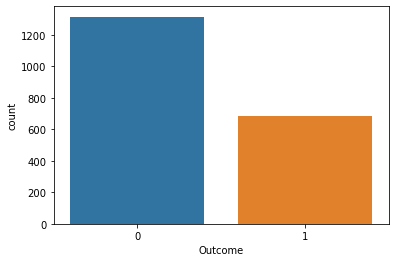

In [9]:
sns.countplot(df['Outcome'],data=df)

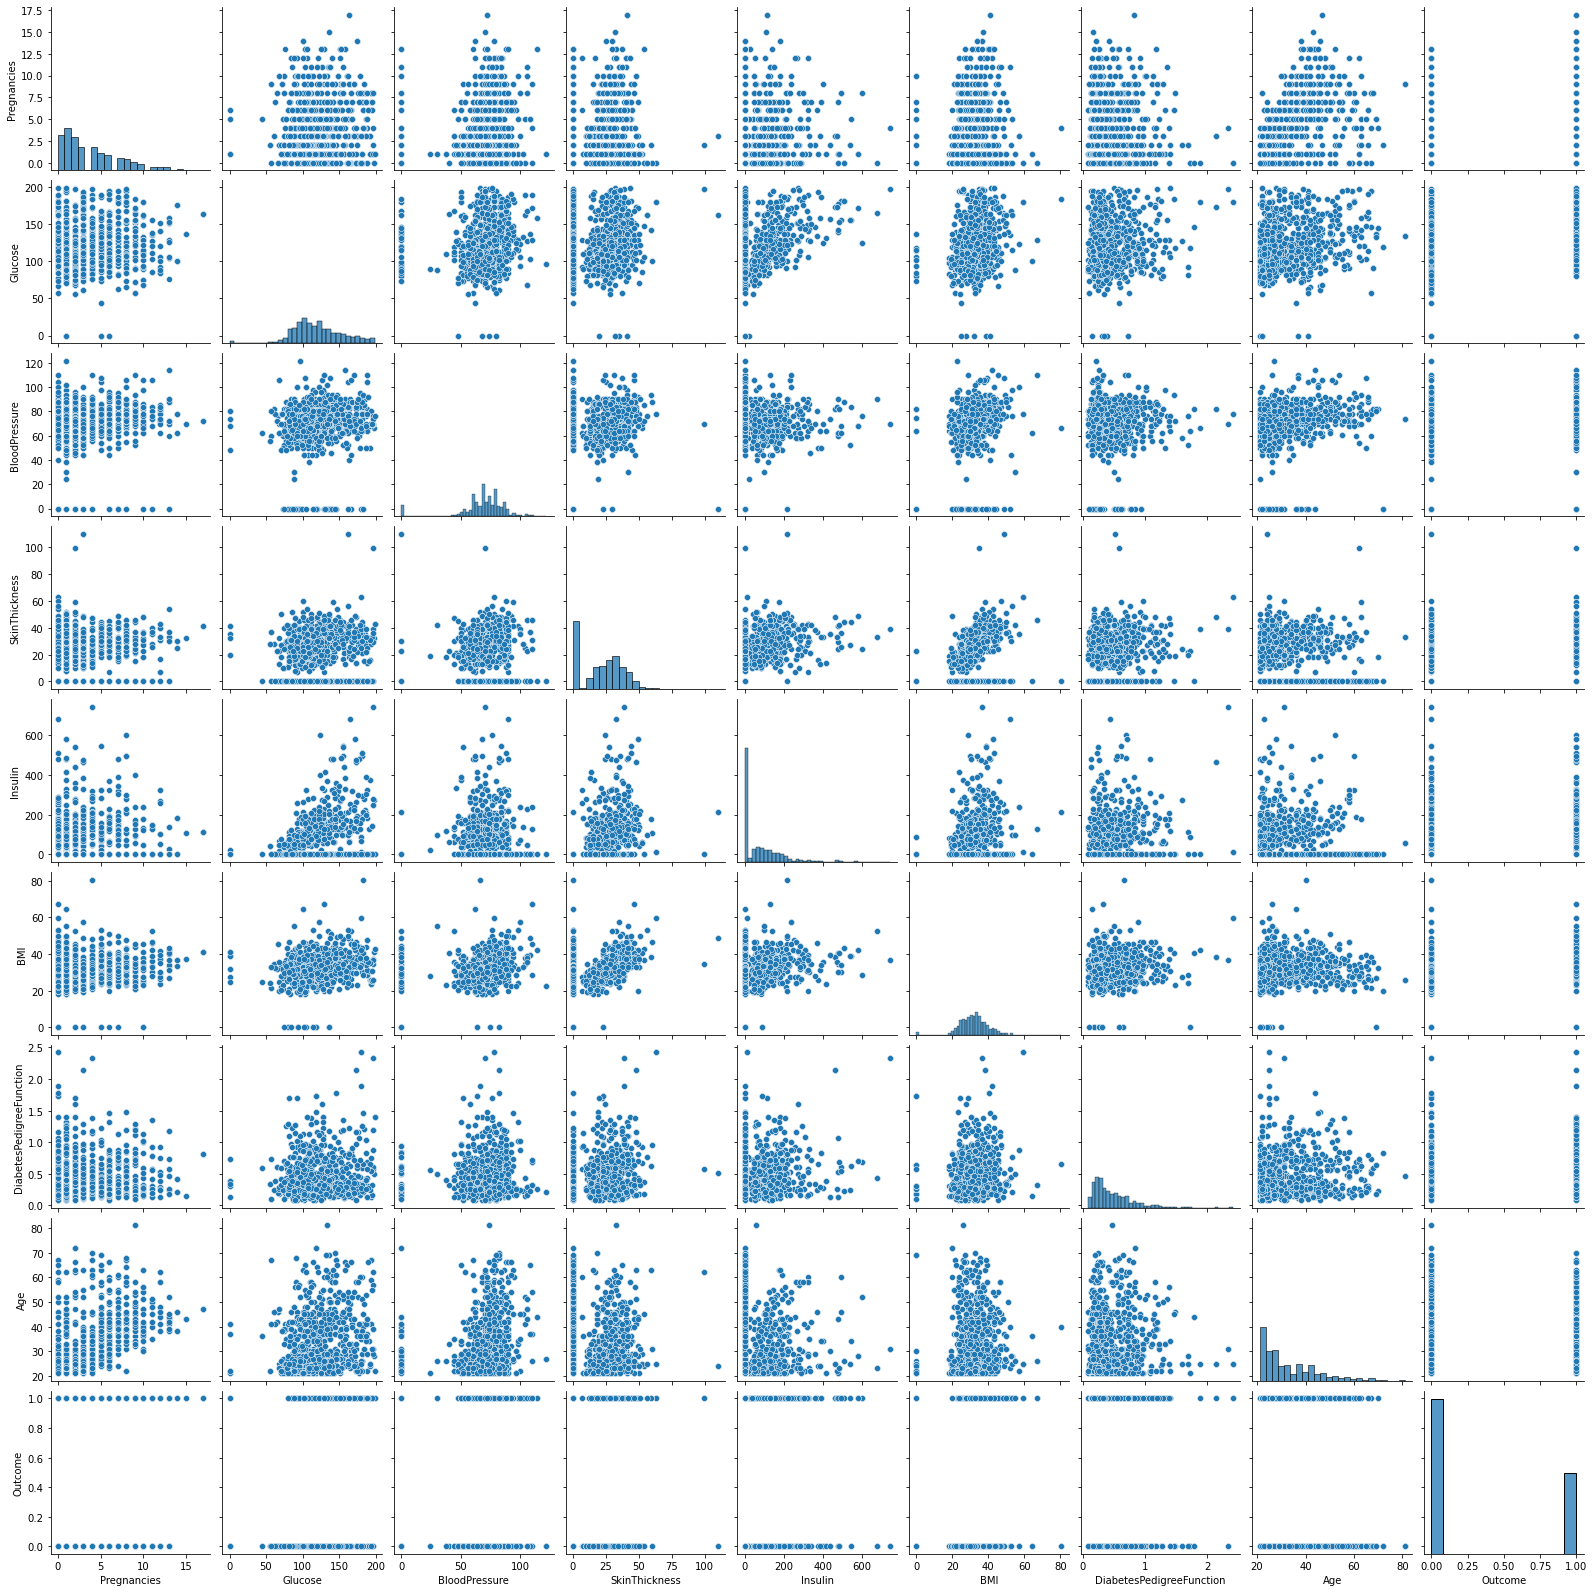

In [10]:
sns.pairplot(df)

<AxesSubplot:>

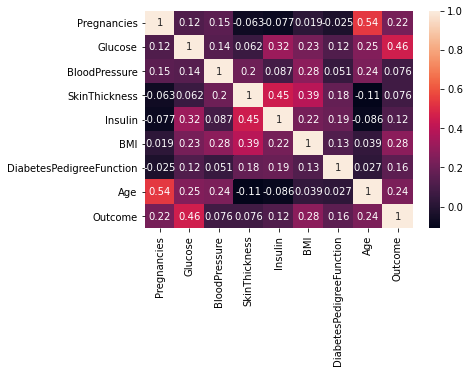

In [11]:
sns.heatmap(data=df.corr(),annot =True)

<AxesSubplot:>

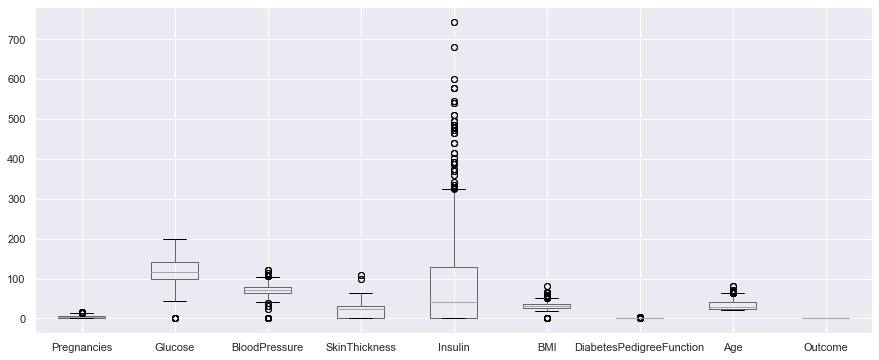

In [12]:
sns.set(palette="Set2")
df.boxplot(figsize=(15,6))

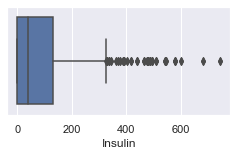

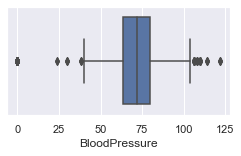

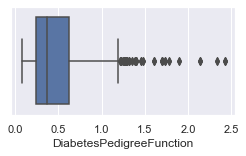

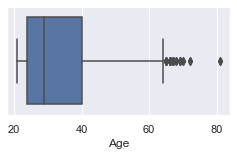

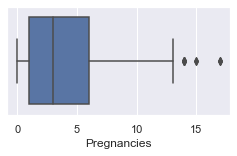

In [13]:
sns.set()

sns.set(rc={'figure.figsize':(4,2)})
sns.boxplot(x=df['Insulin'])
plt.show()
sns.boxplot(x=df['BloodPressure'])
plt.show()
sns.boxplot(x=df['DiabetesPedigreeFunction'])
plt.show()
sns.boxplot(x=df['Age'])
plt.show()
sns.boxplot(x=df['Pregnancies'])
plt.show()

In [14]:
Q1 =df.quantile(0.20)
Q3 = df.quantile(0.80)
IQR = Q3-Q1
print("Q1  ",Q1)
print("Q3  ",Q3)
print("Inter Quartile Range  ",IQR)

Q1   Pregnancies                  1.0000
Glucose                     95.0000
BloodPressure               60.0000
SkinThickness                0.0000
Insulin                      0.0000
BMI                         26.0000
DiabetesPedigreeFunction     0.2218
Age                         23.0000
Outcome                      0.0000
Name: 0.2, dtype: float64
Q3   Pregnancies                   7.000
Glucose                     147.000
BloodPressure                82.000
SkinThickness                35.000
Insulin                     155.000
BMI                          38.100
DiabetesPedigreeFunction      0.687
Age                          42.000
Outcome                       1.000
Name: 0.8, dtype: float64
Inter Quartile Range   Pregnancies                   6.0000
Glucose                      52.0000
BloodPressure                22.0000
SkinThickness                35.0000
Insulin                     155.0000
BMI                          12.1000
DiabetesPedigreeFunction      0.4652
Age     

In [15]:
df= df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

(1781, 9)

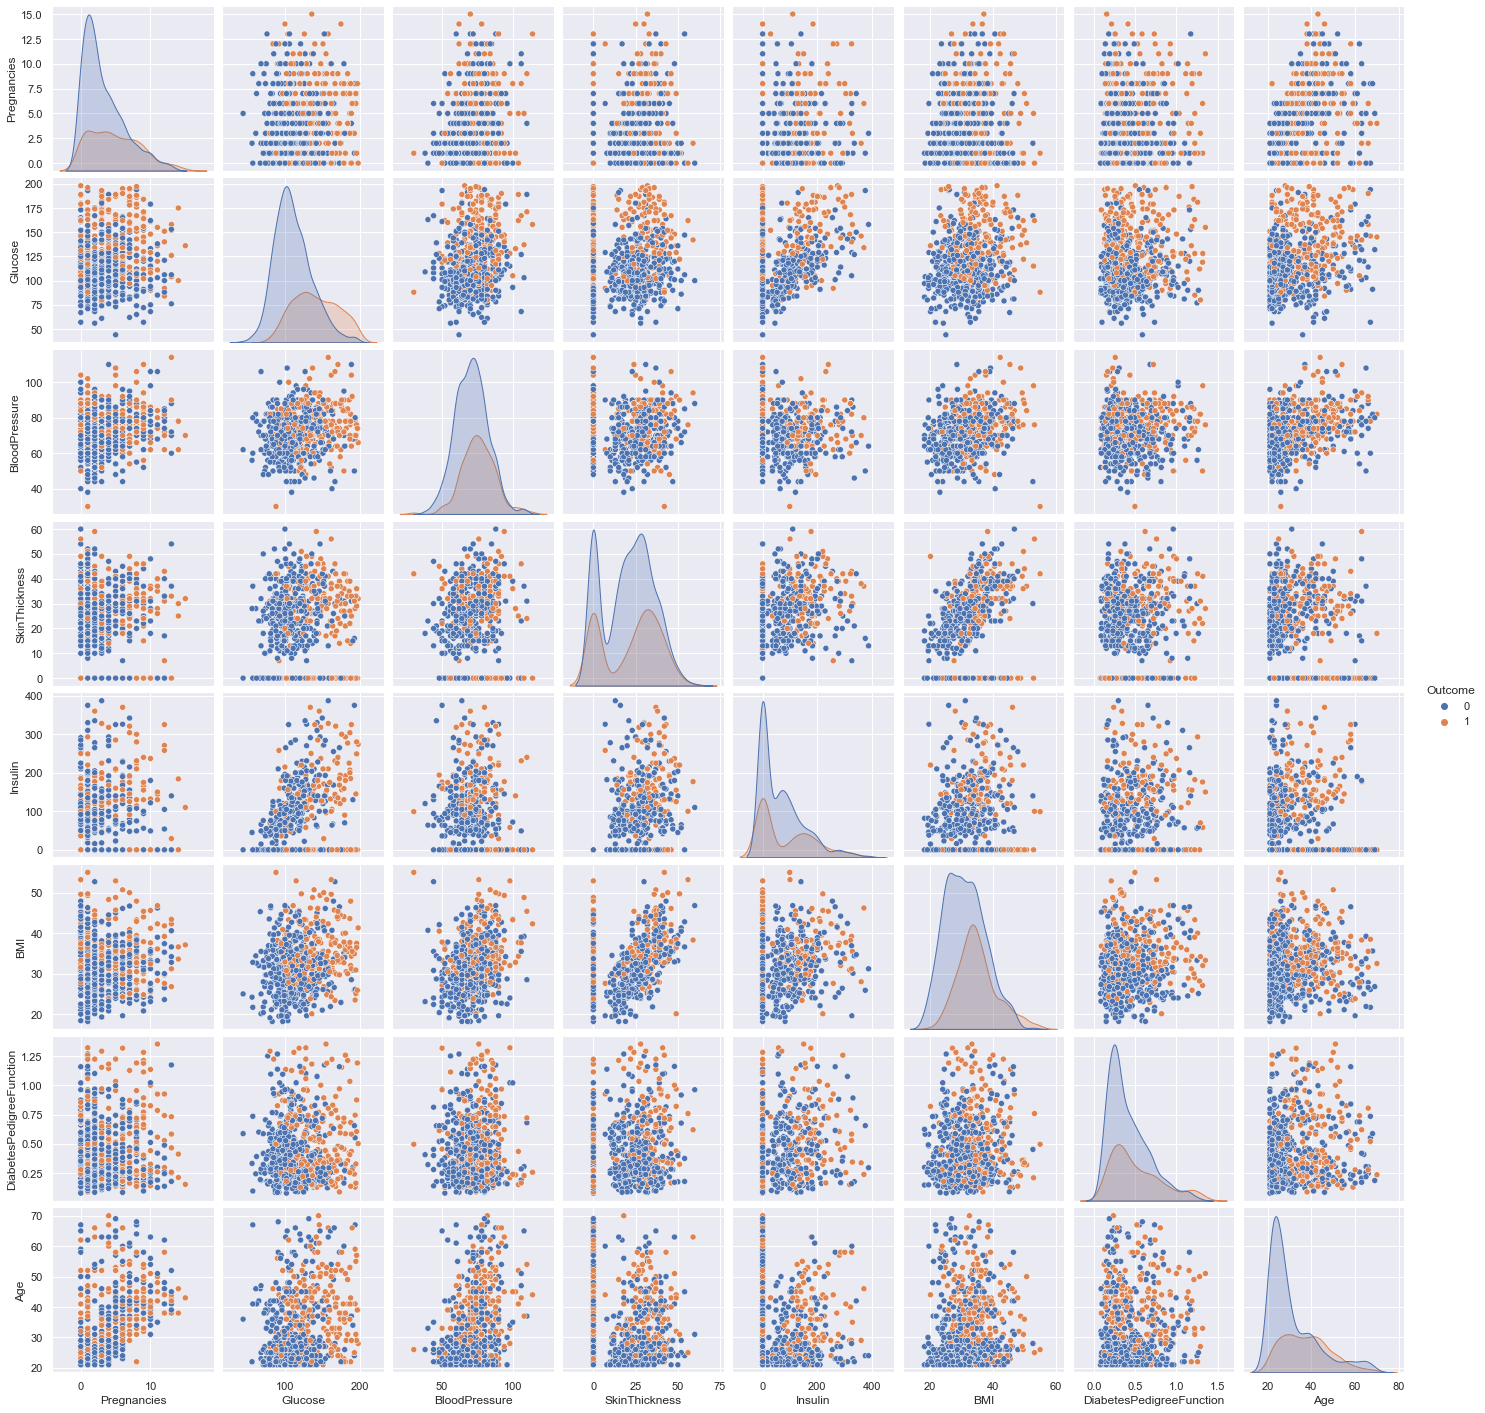

In [16]:

sns.pairplot(df, hue="Outcome")
plt.show()

In [56]:
from sklearn.preprocessing import StandardScaler

In [58]:
y =df['Outcome']

In [59]:
sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(df.drop(["Outcome"],axis = 1),), columns=['Pregnancies', 
'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-0.538853,0.580151,-0.865760,0.910026,-0.826762,0.195311,-1.174416,1.180916
1,-1.148378,-1.219180,0.811879,0.648614,0.604938,0.888117,-0.785611,-0.876350
2,-1.148378,0.480188,-0.362468,1.367498,2.036638,1.505618,-0.301439,-0.790630
3,-1.148378,1.746385,0.476351,0.713967,2.208441,2.138180,2.610930,2.123829
4,0.070672,-0.719366,-0.026940,-0.266329,-0.826762,-1.009569,-0.561865,-0.447753


<AxesSubplot:xlabel='Outcome', ylabel='count'>

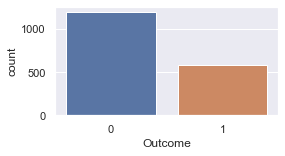

In [60]:
sns.countplot(df['Outcome'],data=df)

In [61]:
from imblearn.over_sampling import RandomOverSampler

In [62]:
xx = df.drop(['Outcome'],axis=1)
yy =df['Outcome']
rdsmple = RandomOverSampler()
X,y  = rdsmple.fit_resample(xx,yy)

<AxesSubplot:xlabel='Outcome', ylabel='count'>

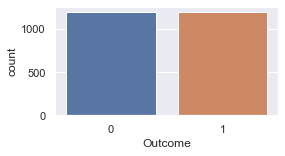

In [63]:
sns.countplot(y)

In [64]:
X.shape

(2390, 8)

In [65]:

from sklearn.model_selection import train_test_split

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [67]:
from sklearn.linear_model import LogisticRegression 

In [68]:
clf =LogisticRegression(random_state=1).fit(X=X_train,y=y_train)
op=clf.predict(X_test)
clf.score(X_test,y_test)

0.7491638795986622

In [69]:
from sklearn.metrics import classification_report
print(classification_report(op, y_test))

              precision    recall  f1-score   support

           0       0.78      0.74      0.76       321
           1       0.72      0.75      0.74       277

    accuracy                           0.75       598
   macro avg       0.75      0.75      0.75       598
weighted avg       0.75      0.75      0.75       598



In [71]:
from sklearn.naive_bayes import GaussianNB
clf =GaussianNB().fit(X_train,y_train)
op=clf.predict(X_test)
clf.score(X_test,y_test)

0.7324414715719063

In [72]:
from sklearn.metrics import classification_report
print(classification_report(op, y_test))

              precision    recall  f1-score   support

           0       0.76      0.73      0.74       319
           1       0.70      0.73      0.72       279

    accuracy                           0.73       598
   macro avg       0.73      0.73      0.73       598
weighted avg       0.73      0.73      0.73       598



In [75]:
from sklearn.neighbors import KNeighborsClassifier
error_rate = []

for i in range(1,15):

    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))


Text(0, 0.5, 'Error Rate')

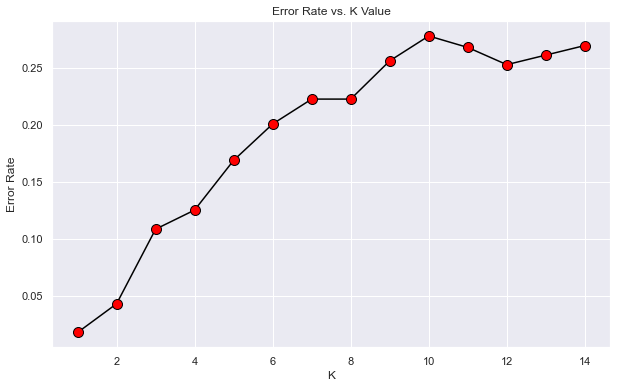

In [76]:
plt.figure(figsize=(10,6))
plt.plot(range(1,15),error_rate,color='black', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [77]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)
op = knn.predict(X_test)
knn.score(X_test,y_test)

0.9565217391304348

In [78]:
from sklearn.metrics import classification_report
print(classification_report(op, y_test))

              precision    recall  f1-score   support

           0       0.97      0.94      0.96       317
           1       0.94      0.97      0.95       281

    accuracy                           0.96       598
   macro avg       0.96      0.96      0.96       598
weighted avg       0.96      0.96      0.96       598



In [81]:
from sklearn.tree import DecisionTreeClassifier
clf =DecisionTreeClassifier().fit(X_train,y_train)
op=clf.predict(X_test)
clf.score(X_test,y_test)

0.9849498327759197

In [80]:
from sklearn.metrics import classification_report
print(classification_report(op,y_test))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       302
           1       0.99      0.97      0.98       296

    accuracy                           0.98       598
   macro avg       0.98      0.98      0.98       598
weighted avg       0.98      0.98      0.98       598



In [86]:
from sklearn.svm import SVC
svc = SVC().fit(X_train, y_train)
op=svc.predict(X_test)
print(svc.score(X_test,y_test))

0.7591973244147158


In [87]:
from sklearn.metrics import classification_report
print(classification_report(op,y_test))

              precision    recall  f1-score   support

           0       0.72      0.79      0.75       279
           1       0.80      0.73      0.76       319

    accuracy                           0.76       598
   macro avg       0.76      0.76      0.76       598
weighted avg       0.76      0.76      0.76       598



In [88]:
from sklearn.ensemble import RandomForestClassifier

In [91]:
rf = RandomForestClassifier(random_state=1).fit(X_train,y_train)
op = rf.predict(X_test)
rf.score(X_test,y_test)

0.9816053511705686

In [92]:
from sklearn.metrics import classification_report
print(classification_report(op, y_test))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       302
           1       0.99      0.97      0.98       296

    accuracy                           0.98       598
   macro avg       0.98      0.98      0.98       598
weighted avg       0.98      0.98      0.98       598



In [41]:
from sklearn.ensemble import AdaBoostClassifier

In [95]:
adb= AdaBoostClassifier(random_state =1,n_estimators=50).fit(X_train,y_train)
op =adb.predict(X_test)
print(adb.score(X_test,y_test))

0.8127090301003345


In [96]:
from sklearn.metrics import classification_report
print(classification_report(op, y_test))

              precision    recall  f1-score   support

           0       0.79      0.84      0.81       291
           1       0.84      0.79      0.81       307

    accuracy                           0.81       598
   macro avg       0.81      0.81      0.81       598
weighted avg       0.81      0.81      0.81       598



In [44]:
from sklearn.ensemble import GradientBoostingClassifier

In [97]:
gdb =GradientBoostingClassifier(random_state=1,n_estimators =50).fit(X_train,y_train)
op =gdb.predict(X_test)
print(gdb.score(X_test,y_test))

0.8344481605351171


In [98]:
from sklearn.metrics import classification_report
print(classification_report(op, y_test))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83       290
           1       0.86      0.81      0.83       308

    accuracy                           0.83       598
   macro avg       0.84      0.84      0.83       598
weighted avg       0.84      0.83      0.83       598



In [47]:
from xgboost import XGBClassifier

In [99]:
xgb =XGBClassifier(random_state=1,n_estimators =150,eval_metric='rmse').fit(X_train,y_train)
op=xgb.predict(X_test)
print(xgb.score(X_test,y_test))

0.9765886287625418


In [100]:
from sklearn.metrics import classification_report
print(classification_report(op, y_test))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       299
           1       0.99      0.96      0.98       299

    accuracy                           0.98       598
   macro avg       0.98      0.98      0.98       598
weighted avg       0.98      0.98      0.98       598



In [50]:
 import lightgbm as lgb

In [101]:
lg = lgb.LGBMClassifier().fit(X_train,y_train)
op = lg.predict(X_test)
print(lg.score(X_test,y_test))

0.9765886287625418


In [102]:
from sklearn.metrics import classification_report
print(classification_report(op, y_test))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       299
           1       0.99      0.96      0.98       299

    accuracy                           0.98       598
   macro avg       0.98      0.98      0.98       598
weighted avg       0.98      0.98      0.98       598



In [103]:
df.shape

(1781, 9)